<a href="https://colab.research.google.com/github/Ezequiel-del/Parciales_de_IA_2-2024/blob/main/PrimerParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset para parcilaes /train.csv')


# Verificar la cantidad de valores faltantes por columna
faltantes = df.isnull().sum()

# Mostrar las columnas que tienen valores faltantes
print(faltantes)

df.info()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64

In [70]:
# Crear la columna 'Has5G' basada en la columna 'price_range'
df['Has5G'] = df['price_range'].apply(lambda x: True if x in [2, 3] else False)

# Crear la columna 'OperatingSystem' basada en la columna 'price_range'
def assign_os(price_range):
    if price_range == 3:  # Costo muy alto - iOS
        return 'iOS'
    elif price_range == 2:  # Costo alto - mezcla de iOS y Android
        return np.random.choice(['iOS', 'Android'], p=[0.7, 0.3])  # 70% iOS, 30% Android
    else:  # Costo bajo y medio - Android o Windows
        return np.random.choice(['Android', 'Windows'])

df['OperatingSystem'] = df['price_range'].apply(assign_os)

# Mostrar las primeras filas del dataset modificado
print(df.head())

# Guardar el dataset modificado
df.to_csv('train_modified.csv', index=False)

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...  2549     9     7         19        0   
1        136        3  ...  2631    17     3          7        1   
2        145        5  ...  2603    11     2          9        1   
3        131        6  ...  2769    16     8         11        1   
4        141        2  ...  1411     8     2         15        1   

   touch_screen  wifi  price_range  Has5G  OperatingSystem  
0             0     1            1  False        

In [55]:
# Función para crear variaciones significativas en los datos
def variar_significativamente(fila):
    # Cambiar numéricos con una variación más grande, garantizando que no sean negativos
    fila['ram'] = max(0, fila['ram'] + np.random.randint(-8000, 8000))  # Variación de hasta 1GB
    fila['battery_power'] = max(0, fila['battery_power'] + np.random.randint(-400, 400))  # Variación significativa de la batería
    fila['px_height'] = max(0, fila['px_height'] + np.random.randint(-500, 500))  # Variación en la altura de píxeles
    fila['px_width'] = max(0, fila['px_width'] + np.random.randint(-500, 500))  # Variación en el ancho de píxeles
    fila['int_memory'] = max(0, fila['int_memory'] + np.random.randint(-256, 265))  # Variación en memoria interna

    # Cambiar características categóricas
    fila['Has5G'] = not fila['Has5G']  # Invertir si tiene 5G
    fila['OperatingSystem'] = np.random.choice(['Android', 'iOS', 'Windows'])  # Asignar un nuevo sistema operativo aleatorio

    return fila

# Duplicar todo el dataset aplicando variaciones significativas
duplicados = []

for i in range(len(df)):
    fila_original = df.iloc[i].copy()  # Copiar la fila original
    fila_duplicada = variar_significativamente(fila_original)  # Variar significativamente la fila duplicada
    duplicados.append(fila_duplicada)  # Agregar la fila duplicada a la lista

# Convertir la lista de duplicados a un DataFrame
duplicados_df = pd.DataFrame(duplicados)

# Combinar el dataset original con los duplicados
df_final = pd.concat([df, duplicados_df], ignore_index=True)

# Ver las primeras filas del nuevo dataset con duplicados
print(df_final.head())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...  2549     9     7         19        0   
1        136        3  ...  2631    17     3          7        1   
2        145        5  ...  2603    11     2          9        1   
3        131        6  ...  2769    16     8         11        1   
4        141        2  ...  1411     8     2         15        1   

   touch_screen  wifi  price_range  Has5G  OperatingSystem  
0             0     1            1  False        

In [71]:
# Función para crear variaciones significativas en los datos
def variar_significativamente(fila):
    # Cambiar numéricos con una variación más grande
    fila['battery_power'] = max(0, fila['battery_power'] + np.random.randint(-1000, 1000))  # Batería
    fila['clock_speed'] = round(np.random.uniform(0.5, 3.0), 2)  # Velocidad del reloj
    fila['int_memory'] = max(0, fila['int_memory'] + np.random.randint(-64, 64))  # Memoria interna
    fila['ram'] = max(0, fila['ram'] + np.random.randint(-2048, 2048))  # RAM
    fila['px_height'] = max(0, fila['px_height'] + np.random.randint(-1000, 1000))  # Altura de píxeles
    fila['px_width'] = max(0, fila['px_width'] + np.random.randint(-1000, 1000))  # Ancho de píxeles
    fila['mobile_wt'] = max(0, fila['mobile_wt'] + np.random.randint(-50, 50))  # Peso del móvil
    fila['talk_time'] = max(0, fila['talk_time'] + np.random.randint(-20, 20))  # Tiempo de conversación

    # Cambiar características categóricas
    fila['blue'] = np.random.choice([True, False])  # Bluetooth
    fila['dual_sim'] = np.random.choice([True, False])  # Doble SIM
    fila['four_g'] = np.random.choice([True, False])  # 4G
    fila['three_g'] = np.random.choice([True, False])  # 3G
    fila['touch_screen'] = np.random.choice([True, False])  # Pantalla táctil
    fila['wifi'] = np.random.choice([True, False])  # WiFi

    # Asignar un nuevo precio de rango (ajustar si es necesario)
    fila['price_range'] = np.random.choice([0, 1, 2, 3])  # Rango de precios

    return fila

# Duplicar todo el dataset aplicando variaciones significativas
duplicados = []

for i in range(len(df)):
    fila_original = df.iloc[i].copy()  # Copiar la fila original
    fila_duplicada = variar_significativamente(fila_original)  # Variar significativamente la fila duplicada
    duplicados.append(fila_duplicada)  # Agregar la fila duplicada a la lista

# Convertir la lista de duplicados a un DataFrame
duplicados_df = pd.DataFrame(duplicados)

# Combinar el dataset original con los duplicados
df_final = pd.concat([df, duplicados_df], ignore_index=True)

# Ver las primeras filas del nuevo dataset con duplicados
print(df_final.head(10))



   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...  2549     9     7       

In [72]:
# Obtener el número de filas y columnas
num_filas, num_columnas = df_final.shape
print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")


Número de filas: 4000, Número de columnas: 23


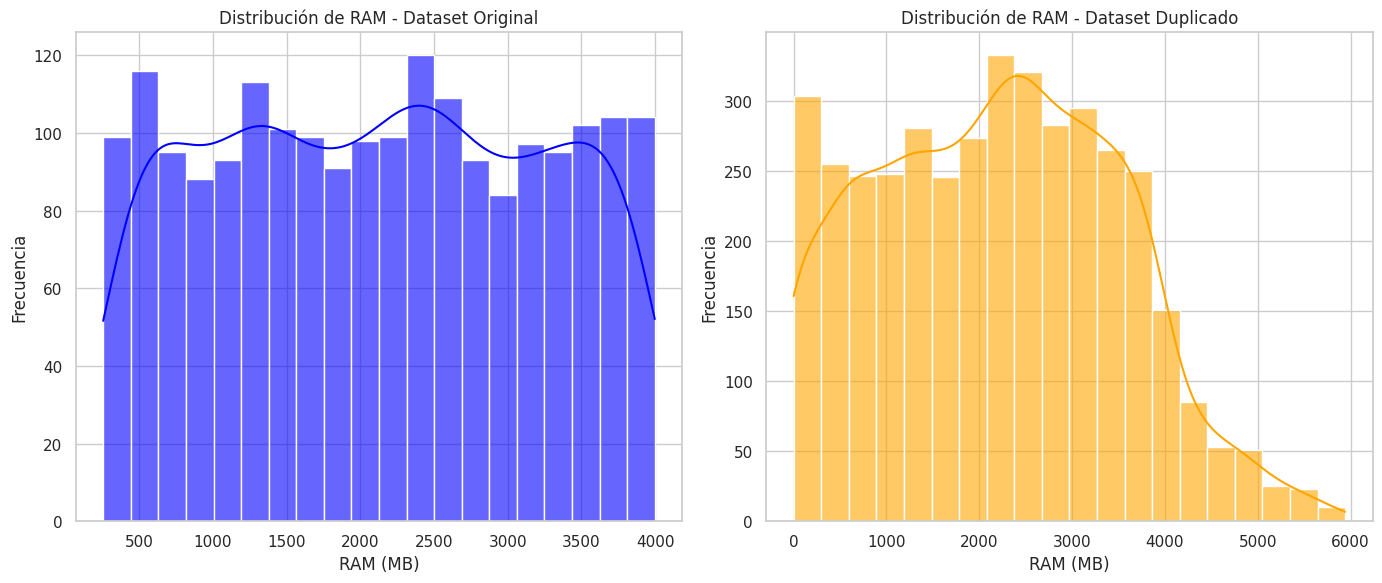

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para el dataset original
sns.histplot(df['ram'], bins=20, kde=True, ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title('Distribución de RAM - Dataset Original')
axes[0].set_xlabel('RAM (MB)')
axes[0].set_ylabel('Frecuencia')

# Gráfico para el dataset duplicado
sns.histplot(df_final['ram'], bins=20, kde=True, ax=axes[1], color='orange', alpha=0.6)
axes[1].set_title('Distribución de RAM - Dataset Duplicado')
axes[1].set_xlabel('RAM (MB)')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


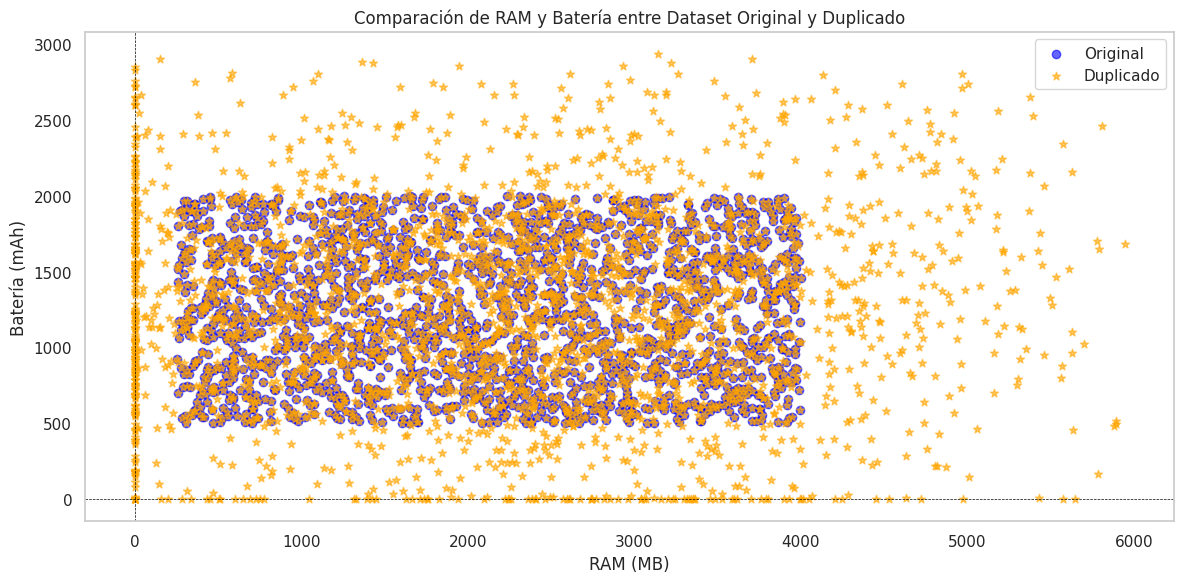

In [74]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura
plt.figure(figsize=(12, 6))

# Gráfico de dispersión para el dataset original
plt.scatter(df['ram'], df['battery_power'], color='blue', label='Original', alpha=0.6, marker='o')

# Gráfico de dispersión para el dataset duplicado
plt.scatter(df_final['ram'], df_final['battery_power'], color='orange', label='Duplicado', alpha=0.6, marker='*')

# Añadir líneas de referencia
plt.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='black', linewidth=0.5, linestyle='--')

# Configurar el título y las etiquetas
plt.title('Comparación de RAM y Batería entre Dataset Original y Duplicado')
plt.xlabel('RAM (MB)')
plt.ylabel('Batería (mAh)')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [75]:
# Calcular las diferencias
df_diff = pd.DataFrame({
    'RAM Original': df['ram'],
    'Battery Original': df['battery_power'],
    'RAM Duplicado': df_final['ram'],
    'Battery Duplicado': df_final['battery_power'],
})

# Calcular las diferencias
df_diff['Diferencia RAM'] = df_diff['RAM Duplicado'] - df_diff['RAM Original']
df_diff['Diferencia Batería'] = df_diff['Battery Duplicado'] - df_diff['Battery Original']

# Mostrar las primeras filas de las diferencias
print(df_diff.head())


   RAM Original  Battery Original  RAM Duplicado  Battery Duplicado  \
0        2549.0             842.0           2549                842   
1        2631.0            1021.0           2631               1021   
2        2603.0             563.0           2603                563   
3        2769.0             615.0           2769                615   
4        1411.0            1821.0           1411               1821   

   Diferencia RAM  Diferencia Batería  
0             0.0                 0.0  
1             0.0                 0.0  
2             0.0                 0.0  
3             0.0                 0.0  
4             0.0                 0.0  


In [77]:
# Mostrar las primeras 10 filas del dataset original
print("Primeras 10 filas del Dataset Original:")
print(df.head(5))

# Mostrar las primeras 10 filas del dataset duplicado
print("\nPrimeras 10 filas del Dataset Duplicado:")
print(df_final.head(5))

Primeras 10 filas del Dataset Original:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...  2549     9     7         19        0   
1        136        3  ...  2631    17     3          7        1   
2        145        5  ...  2603    11     2          9        1   
3        131        6  ...  2769    16     8         11        1   
4        141        2  ...  1411     8     2         15        1   

   touch_screen  wifi  price_range  Has5G  OperatingSystem  
0        